In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from google.colab import drive
import os
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Flatten, Conv2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import SparseCategoricalAccuracy
from keras.preprocessing.image import ImageDataGenerator

In [2]:
def get_data():
  '''
  mount the data from google drive to runtime
  '''
  if not os.path.exists('/content/gdrive'):
    drive.mount('/content/gdrive')

  with np.load('/content/gdrive/MyDrive/Colab Notebooks/flatland_train.npz') as data:
    return data[data.files[0]], data[data.files[1]]

In [3]:
'''
normalize the features and move y values as given in the task
'''

X, y = get_data()
y[y != 0] -= 2
X /= 255

In [4]:
'''
image augmentation generator
'''

train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range = 0.2,
)

In [5]:
'''
doubling the size of given data inputs, accrodingly the y values
'''

X_doubled = np.zeros([2*X.shape[0], X.shape[1], X.shape[2]])

X_doubled[:X.shape[0], :, :] = X[:X.shape[0], :, :]
X_doubled[X.shape[0]:, :, :] = X[:X.shape[0], :, :]

X_doubled = X_doubled.reshape(X_doubled.shape[0], X_doubled.shape[1], X_doubled.shape[2], 1)
y_doubled = np.concatenate((y, y))

In [6]:
'''
augmenting the data with generator
'''

augmented_data = train_datagen.flow(
    X_doubled,
    y_doubled,
    batch_size=X_doubled.shape[0]
)

In [7]:
'''
assign the data
'''

X_augmented = augmented_data[0][0]
y_augmented = augmented_data[0][1]

In [8]:
'''
y values, classification outcomes
'''

np.unique(y)

array([0., 1., 2., 3., 4.])

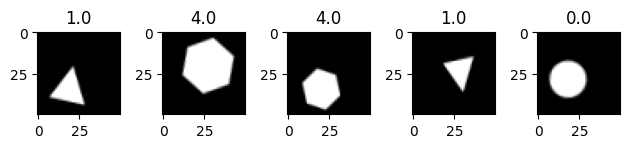

In [9]:
'''
image visualization
'''

fig, axes = plt.subplots(1, 5)

for i in range(5):
  axes[i].imshow(X_augmented[i], cmap='gray')
  axes[i].set_title(y_augmented[i])

plt.tight_layout()
plt.show()

In [10]:
'''
Convolutional network model via Sequential()
'''

model = Sequential()
model.add(Conv2D(10, kernel_size=(3, 3), input_shape=[50, 50, 1], activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(14, kernel_size=(4, 4), activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(18, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.005),
              metrics=[SparseCategoricalAccuracy()],
              )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 10)        100       
                                                                 
 dropout (Dropout)           (None, 48, 48, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 14)        2254      
                                                                 
 dropout_1 (Dropout)         (None, 45, 45, 14)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 18)        6318      
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 18)          0         
 D)                                                              
                                                        

In [11]:
'''
fitting the model
'''

loss = model.fit(X_augmented,
                 y_augmented,
                 epochs=40,
                 batch_size=128,
                 validation_split=0.2)

Epoch 1/40
125/125 [==============================] - 12s 24ms/step - loss: 1.3910 - sparse_categorical_accuracy: 0.3738 - val_loss: 1.3255 - val_sparse_categorical_accuracy: 0.4145
Epoch 2/40
125/125 [==============================] - 2s 17ms/step - loss: 0.9688 - sparse_categorical_accuracy: 0.5872 - val_loss: 0.6712 - val_sparse_categorical_accuracy: 0.7347
Epoch 3/40
125/125 [==============================] - 2s 18ms/step - loss: 0.5778 - sparse_categorical_accuracy: 0.7919 - val_loss: 0.4267 - val_sparse_categorical_accuracy: 0.8775
Epoch 4/40
125/125 [==============================] - 2s 16ms/step - loss: 0.3720 - sparse_categorical_accuracy: 0.8897 - val_loss: 0.3037 - val_sparse_categorical_accuracy: 0.9250
Epoch 5/40
125/125 [==============================] - 2s 16ms/step - loss: 0.2921 - sparse_categorical_accuracy: 0.9189 - val_loss: 0.3495 - val_sparse_categorical_accuracy: 0.9010
Epoch 6/40
125/125 [==============================] - 2s 16ms/step - loss: 0.2606 - sparse_cat

<Axes: >

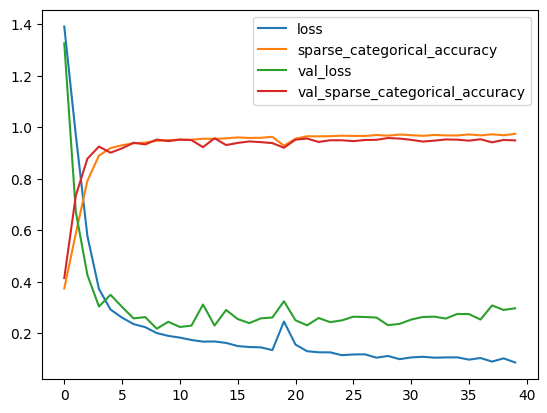

In [12]:
'''
checking progression
'''

pd.DataFrame(loss.history).plot()

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tried but did not work

In [ ]:
#splitting the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
loss = model.fit(train_generator,
                 epochs=100,
                 batch_size=128,
                 verbose=1,
                 validation_data=(X_test, y_test))

Epoch 1/100
63/63 [==============================] - 7s 70ms/step - loss: 13.7323 - accuracy: 0.2836 - val_loss: 1.5879 - val_accuracy: 0.2805
Epoch 2/100
63/63 [==============================] - 5s 85ms/step - loss: 1.5822 - accuracy: 0.2865 - val_loss: 1.5879 - val_accuracy: 0.2805
Epoch 3/100
63/63 [==============================] - 4s 59ms/step - loss: 1.5806 - accuracy: 0.2865 - val_loss: 1.5879 - val_accuracy: 0.2805
Epoch 4/100
63/63 [==============================] - 4s 57ms/step - loss: 1.5845 - accuracy: 0.2775 - val_loss: 1.5892 - val_accuracy: 0.2805
Epoch 5/100
41/63 [==================>...........] - ETA: 2s - loss: 1.5834 - accuracy: 0.2882

KeyboardInterrupt: ignored

In [ ]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 128)  #images to generate in a batch

In [ ]:
threshold = 0.5
X = (X >= 0.5).astype(int)

In [ ]:
# Pad each element within the tensor with 2 zeros
padded_tensor = np.zeros((X.shape[0], X.shape[1]+2, X.shape[2]+2))
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        for k in range(X.shape[2]):
            padded_tensor[i, j+1, k+1] = X[i, j, k]

In [ ]:
replace_X = []

for i in range(len(X)):
  replace_X.append(cv2.resize(X[i], (25,25)))

X = np.array(replace_X)

In [ ]:
def invert_colors(image):
    # Determine the maximum pixel value based on the data type
    max_value = np.max(image)

    # Invert colors by subtracting each pixel value from the maximum value
    inverted_image = max_value - image

    return inverted_image

images_to_invert_indices = np.random.choice(range(len(X)), int(0.1 * len(X)), replace=False)

# Create a list to store both original and inverted images
combined_images = []

# Iterate through the images and create combined array of original and inverted images
for i in range(len(X)):
    if i in images_to_invert_indices:
        # Invert colors for selected images
        combined_images.append(invert_colors(X[i]))
    else:
        combined_images.append(X[i])

# Convert the combined images list into a single NumPy array
X = np.array(combined_images)

# Check the shape of the combined array
print("Shape of Combined Images Array:", X.shape)

In [ ]:
class CustomPreprocessingLayer(tensorflow.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CustomPreprocessingLayer, self).__init__(**kwargs)
        # Define any initialization logic here

    def call(self, X):
        # Define your custom preprocessing logic here
        X = tf.cast(X >= 0.5, tf.int32)  # Convert boolean mask to integers (0 or 1)
        X = tf.cast(X, tf.float32)

        #padded_tensor = tf.pad(X, paddings=[[0, 0], [1, 1], [1, 1], [0,0]])  # Pad the tensor

        # Return the padded tensor
        return padded_tensor

         # Replace with your preprocessing function
        return padded_tensor

    def get_config(self):
        base_config = super(CustomPreprocessingLayer, self).get_config()
        return {**base_config}

In [ ]:
tf.experimental.numpy.experimental_enable_numpy_behavior(
    prefer_float32=False, dtype_conversion_mode='legacy'
)

In [ ]:
X, y = get_data()
y[y != 0] -= 2
X /= 255

seq = iaa.Sequential([
    #iaa.Fliplr(0.3),  # Flip horizontally with a 50% chance
    #iaa.Affine(rotate=(-15, 15)),  # Rotate image by -45 to 45 degrees
    iaa.Affine(translate_percent={"x": (-0.3, 0.3), "y": (-0.3, 0.3)}),
    iaa.Affine(scale={"x": (1.0, 1.2), "y": (1.0, 1.2)})
    #iaa.GaussianBlur(sigma=(0.0, 1.0)),  # Apply Gaussian blur with sigma range
    #aa.AdditiveGaussianNoise(scale=(0, 0.001)),  # Add Gaussian noise
    #iaa.Affine(shear=(-10, 10))  # Apply shearing transformation
])

X_aug = []
X = X.astype(np.float32)

for i in range(len(X)):
  X_aug.append(seq(image=X[i]))

X = np.array(X_aug)

del X_aug

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)